# Dados discrepantes
Como identificar e tratar outliers.

In [ ]:
!pip install kagglehub[pandas-datasets]

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

import kagglehub
from kagglehub import KaggleDatasetAdapter

In [2]:
# Título do arquivo a ser descarregado
file_path = "weather_classification_data.csv"

In [3]:
# Coleta de dados e armazenamento em dataframe Pandas
df = kagglehub.load_dataset(KaggleDatasetAdapter.PANDAS,"nikhil7280/weather-type-classification",file_path)

/tmp/ipython-input-111816136.py:2: DeprecationWarning: Use dataset_load() instead of load_dataset(). load_dataset() will be removed in a future version.
  df = kagglehub.load_dataset(KaggleDatasetAdapter.PANDAS,"nikhil7280/weather-type-classification",file_path)


100%|██████████| 806k/806k [00:00<00:00, 2.90MB/s]


In [4]:
df.head()

,Temperature,Humidity,Wind Speed,Precipitation (%),Cloud Cover,Atmospheric Pressure,UV Index,Season,Visibility (km),Location,Weather Type
0,14.0,73,9.5,82.0,partly cloudy,1010.82,2,Winter,3.5,inland,Rainy
1,39.0,96,8.5,71.0,partly cloudy,1011.43,7,Spring,10.0,inland,Cloudy
2,30.0,64,7.0,16.0,clear,1018.72,5,Spring,5.5,mountain,Sunny
3,38.0,83,1.5,82.0,clear,1026.25,7,Spring,1.0,coastal,Sunny
4,27.0,74,17.0,66.0,overcast,990.67,1,Winter,2.5,mountain,Rainy


In [5]:
df.shape

(13200, 11)

## Identificação visual

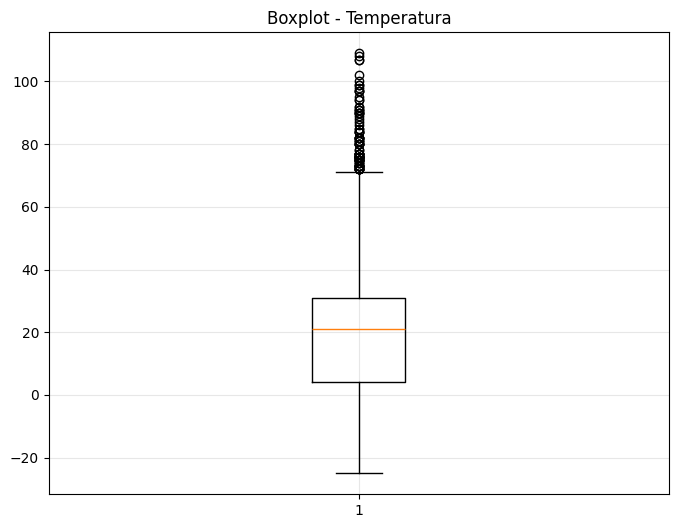

In [6]:
# Criar o boxplot
plt.figure(figsize=(8, 6))
plt.boxplot(df['Temperature'].dropna())
plt.title('Boxplot - Temperatura')
plt.grid(True, alpha=0.3)
plt.show()

## Identificação em números absolutos

In [7]:
df['Temperature'].describe()

,Temperature
count,13200.000000
mean,19.127576
std,17.386327
min,-25.000000
25%,4.000000
50%,21.000000
75%,31.000000
max,109.000000


In [8]:
# Intervalo entre quartil
q1 = df['Temperature'].quantile(0.25)
q2 = df['Temperature'].quantile(0.75)

intervalo_q = q2-q1

In [9]:
limite_inferior = q1 - (intervalo_q * 1.5)
limite_inferior

np.float64(-36.5)

In [10]:
limite_superior = q2 + (intervalo_q * 1.5)
limite_superior

np.float64(71.5)

## Exclusão de outliers

In [11]:
df_sem_outlier = df[(df['Temperature'] < limite_inferior) | (df['Temperature'] < limite_superior)]

In [12]:
df_sem_outlier.shape

(13108, 11)

## Método Winsorização (Capping)

In [13]:
def winsorize_coluna(df, coluna, limite_inferior_substituicao=5, limite_superior_substituicao=95):
    # Calcula valor correspondente aos percentis
    limite_inferior_substituicao = np.percentile(df[coluna].dropna(), limite_inferior_substituicao)
    limite_superior_substituicao = np.percentile(df[coluna].dropna(), limite_superior_substituicao)

    # Aplica winsorização (capping)
    df[coluna] = df[coluna].clip(lower=limite_inferior_substituicao, upper=limite_superior_substituicao)

    return df

In [14]:
df_winsorized = winsorize_coluna(df.copy(), 'Temperature', 5, 75)

In [15]:
df_winsorized['Temperature'].describe()

,Temperature
count,13200.000000
mean,17.076288
std,13.668868
min,-9.000000
25%,4.000000
50%,21.000000
75%,31.000000
max,31.000000
